In [314]:
%%capture
%pip install pandas
%pip install torch
%pip install scikit-learn
%pip install matplotlib

In [315]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [316]:
class Model(nn.Module):
    # in_features is 17 (9 original + 4 mean + 4 sd features)
    def __init__(self, in_features=17, h1=60, h2=30): 
        super().__init__()
        # Layer 1
        self.fc1 = nn.Linear(in_features, h1)
        self.drop1 = nn.Dropout(p=0.3)
        # Layer 2
        self.fc2 = nn.Linear(h1, h2)
        self.drop2 = nn.Dropout(p=0.3)
        # Final Layer: 1 output neuron
        self.out = nn.Linear(h2, 1) 

    def forward(self, x):
        x = f.relu(self.fc1(x))
        x = self.drop1(x)
        x = f.relu(self.fc2(x))
        x = self.drop2(x)
        return self.out(x)

In [317]:
torch.manual_seed(67)

dataset_path = "./"

automated_dataset = pd.read_json(dataset_path + "automatedAccountData.json")
non_automated_dataset = pd.read_json(dataset_path + "nonautomatedAccountData.json")

In [318]:
combined = pd.concat([automated_dataset, non_automated_dataset], axis=0)

combined

,userMediaCount,mediaLikeNumbers,mediaCommentNumbers,mediaCommentsAreDisabled,mediaHashtagNumbers,mediaUploadTimes,mediaHasLocationInfo,userFollowerCount,userFollowingCount,userHasHighlighReels,userHasExternalUrl,userTagsCount,userBiographyLength,usernameLength,usernameDigitCount,automatedBehaviour
0,97,"[100, 78, 112, 78, 77, 111, 97, 95, 63, 83, 42...","[5, 2, 10, 0, 3, 2, 2, 2, 4, 0, 0, 6, 6, 0, 2,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[10, 10, 12, 10, 13, 13, 10, 12, 10, 11, 11, 1...","[1540847457, 1540744841, 1538410400, 153729214...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1612,7108,0,1,36,133,12,0,1
1,863,"[229, 331, 180, 326, 313, 157, 245, 161, 182, ...","[3, 2, 3, 4, 7, 2, 0, 6, 2, 2, 1, 9, 2, 0, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[8, 11, 14, 17, 12, 10, 13, 14, 14, 11, 10, 11...","[1542664246, 1542569444, 1542564418, 154211928...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3028,912,1,0,77,99,11,0,1
2,149,"[237, 254, 350, 257, 180, 172, 141, 84, 218, 8...","[12, 16, 37, 11, 3, 4, 2, 4, 5, 1, 1, 2, 3, 3,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[25, 25, 25, 25, 15, 15, 15, 5, 15, 10, 10, 10...","[1543220394, 1542972220, 1542868998, 154278889...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...",5213,1157,1,1,56,120,18,0,1
3,33,"[163, 30, 92, 111, 145, 110, 81, 81, 61, 60, 6...","[2, 2, 7, 14, 17, 3, 2, 5, 2, 1, 5, 5, 8, 1, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 14, 14, 0, 0...","[1543886933, 1543793413, 1543704343, 154344770...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12423,1763,0,0,2,55,13,0,1
4,1000,"[61, 222, 437, 829, 681, 440, 920, 256, 1017, ...","[4, 0, 13, 9, 9, 6, 16, 4, 25, 6, 3, 4, 16, 10...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 1, 2, 3, 3, 0, 0, 1, 0, 2, 1, 2, 3, 1, 1, ...","[1543939920, 1543699089, 1543187756, 154264414...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",9496,2412,1,0,91,33,8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,26,"[117, 82, 70, 50, 94, 45, 40, 47, 44, 43, 45, ...","[0, 1, 0, 0, 4, 0, 0, 2, 1, 0, 5, 6, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 0, 2, ...","[1533665377, 1529705967, 1525534881, 145340569...","[1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, ...",303,335,0,0,23,22,12,0,0
696,12,"[86, 87, 75, 24, 30, 29, 22, 33, 34, 29, 17, 13]","[4, 5, 10, 0, 0, 1, 1, 2, 0, 0, 3, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[1541858886, 1539619797, 1537199999, 146400347...","[1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0]",270,318,0,0,10,23,11,0,0
697,11,"[28, 18, 20, 15, 8, 13, 17, 15, 10, 4, 11]","[0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2, 10, 6, 0, 3, 2, 6, 4, 0, 2, 0]","[1417601401, 1416411495, 1412454197, 140580953...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",175,179,0,0,4,6,5,0,0
698,116,"[146, 132, 123, 148, 122, 118, 130, 144, 119, ...","[10, 0, 0, 0, 2, 2, 4, 9, 4, 0, 4, 3, 3, 3, 3,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1540144489, 1534530033, 1532627229, 153228440...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, ...",311,311,0,0,13,0,10,0,0


In [319]:
# Columns that contain lists/arrays
sequence_cols = [
    "mediaLikeNumbers",
    "mediaCommentNumbers",
    "mediaHashtagNumbers",
    "mediaHasLocationInfo"
]

# Calculate Mean and Standard Deviation for all sequence columns
for col in sequence_cols:
    
    # 1. Calculate Standard Deviation (sd_) from the original list
    new_col_name = 'sd_' + col
    # We use a lambda to calculate SD only if the list is not empty, otherwise return 0.0
    combined[new_col_name] = combined[col].apply(lambda x: np.std(x) if len(x) > 0 else 0.0)

    # 2. Calculate Mean (replaces the original list column)
    # We use a lambda to calculate Mean only if the list is not empty, otherwise return 0.0
    combined[col] = combined[col].apply(lambda x: np.mean(x) if len(x) > 0 else 0.0)

# Apply the mean function to each list in the sequence columns
for col in sequence_cols:
    # Use .apply(np.mean) to calculate the mean of the list in each cell
    # Note: np.mean works on lists/arrays and handles empty lists gracefully (returns NaN)
    combined[col] = combined[col].apply(np.mean)

# Fill any NaN values (from empty lists) with 0.0 or a suitable default
combined = combined.fillna(0.0)

combined

,userMediaCount,mediaLikeNumbers,mediaCommentNumbers,mediaCommentsAreDisabled,mediaHashtagNumbers,mediaUploadTimes,mediaHasLocationInfo,userFollowerCount,userFollowingCount,userHasHighlighReels,userHasExternalUrl,userTagsCount,userBiographyLength,usernameLength,usernameDigitCount,automatedBehaviour,sd_mediaLikeNumbers,sd_mediaCommentNumbers,sd_mediaHashtagNumbers,sd_mediaHasLocationInfo
0,97,55.041237,2.453608,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13.886598,"[1540847457, 1540744841, 1538410400, 153729214...",0.979381,1612,7108,0,1,36,133,12,0,1,29.795495,3.458206,5.759575,0.142104
1,863,61.212051,1.701043,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.115875,"[1542664246, 1542569444, 1542564418, 154211928...",0.505214,3028,912,1,0,77,99,11,0,1,110.261105,2.774422,3.200596,0.499973
2,149,70.939597,2.026846,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10.302013,"[1543220394, 1542972220, 1542868998, 154278889...",0.248322,5213,1157,1,1,56,120,18,0,1,49.064022,3.803824,5.124890,0.432040
3,33,65.181818,4.787879,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.121212,"[1543886933, 1543793413, 1543704343, 154344770...",0.000000,12423,1763,0,0,2,55,13,0,1,34.639664,5.425850,3.967730,0.000000
4,1000,160.267000,3.585000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.008000,"[1543939920, 1543699089, 1543187756, 154264414...",0.269000,9496,2412,1,0,91,33,8,0,1,152.971042,4.013325,5.482877,0.443440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,26,39.346154,1.115385,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.500000,"[1533665377, 1529705967, 1525534881, 145340569...",0.307692,303,335,0,0,23,22,12,0,0,25.756168,1.804416,1.886185,0.461538
696,12,39.916667,2.166667,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.083333,"[1541858886, 1539619797, 1537199999, 146400347...",0.416667,270,318,0,0,10,23,11,0,0,25.519464,2.881936,0.276385,0.493007
697,11,14.454545,0.363636,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",3.181818,"[1417601401, 1416411495, 1412454197, 140580953...",0.000000,175,179,0,0,4,6,5,0,0,6.169774,0.771389,2.979267,0.000000
698,116,90.646552,3.836207,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.215517,"[1540144489, 1534530033, 1532627229, 153228440...",0.387931,311,311,0,0,13,0,10,0,0,33.299129,3.151201,0.469887,0.487279


In [320]:
X = combined.drop(["automatedBehaviour", "mediaUploadTimes", "mediaCommentsAreDisabled"], axis=1)
feature_names = X.columns.tolist()
y = combined["automatedBehaviour"]
X = X.values
y = y.values

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=67)

In [322]:
from sklearn.preprocessing import StandardScaler

# 1. Initialize the Scaler
scaler = StandardScaler()

# 2. Fit the scaler ONLY on the training data to prevent data leakage
# X_train is still a NumPy array at this point
X_train = scaler.fit_transform(X_train)

# 3. Apply the transformation to the test data
X_test = scaler.transform(X_test)

In [323]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [324]:
model = Model()
criterion = nn.BCEWithLogitsLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [325]:
epochs = 500
losses = []
y_pred_probs = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    y_pred_probs.append(y_pred.detach().numpy())
    losses.append(loss.detach().numpy())

    if i % 10 == 0:
        print(f"{i}) Loss = {loss}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0) Loss = 0.7125269770622253
10) Loss = 0.4031226336956024
20) Loss = 0.2626325190067291
30) Loss = 0.2361195832490921
40) Loss = 0.2032809555530548
50) Loss = 0.18890979886054993
60) Loss = 0.17758890986442566
70) Loss = 0.16411656141281128
80) Loss = 0.1567896604537964
90) Loss = 0.15927931666374207
100) Loss = 0.15120594203472137
110) Loss = 0.15598276257514954
120) Loss = 0.14717145264148712
130) Loss = 0.13461706042289734
140) Loss = 0.14122077822685242
150) Loss = 0.1375453621149063
160) Loss = 0.13958632946014404
170) Loss = 0.12874957919120789
180) Loss = 0.13160529732704163
190) Loss = 0.12565596401691437
200) Loss = 0.11635696887969971
210) Loss = 0.12230873852968216
220) Loss = 0.11290387064218521
230) Loss = 0.12227180600166321
240) Loss = 0.10993458330631256
250) Loss = 0.11553091555833817
260) Loss = 0.1075647622346878
270) Loss = 0.10734569281339645
280) Loss = 0.11448647826910019
290) Loss = 0.10192934423685074
300) Loss = 0.1100183054804802
310) Loss = 0.10536894202232

Text(0.5, 0, 'Epoch')

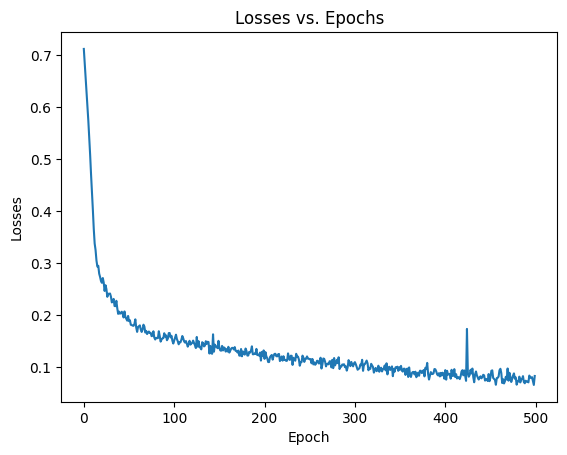

In [326]:
plt.plot(losses)
plt.title("Losses vs. Epochs")
plt.ylabel("Losses")
plt.xlabel("Epoch")

AUC: 0.9737


Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

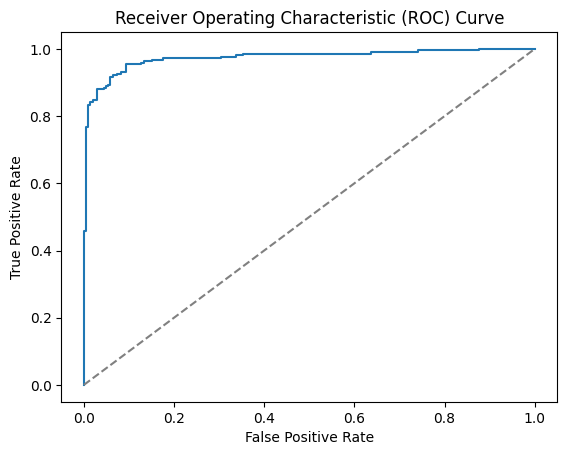

In [327]:
model.eval()

# Get predicted probabilities on test set
with torch.no_grad():
    logits = model(X_test)                      # forward pass
    y_pred_proba = torch.sigmoid(logits).detach().numpy().flatten()  # convert logits → probabilities

y_test_np = y_test.numpy().flatten()
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.4f}")

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

### Repeat, Dropping Least Important Features

In [328]:
baseline_auc = roc_auc_score(y_test_np, y_pred_proba)
X_test_np = X_test.numpy().copy()

importances = []
for j in range(X_test_np.shape[1]):
    col_backup = X_test_np[:, j].copy()
    np.random.shuffle(X_test_np[:, j])
    with torch.no_grad():
        logits_perm = model(torch.FloatTensor(X_test_np))
        proba_perm = torch.sigmoid(logits_perm).detach().numpy().flatten()
    importances.append(baseline_auc - roc_auc_score(y_test_np, proba_perm))
    X_test_np[:, j] = col_backup


In [329]:
k = 15  # number of features to drop
least_idx = np.argsort(importances)[:k]
cols_to_drop = [feature_names[i] for i in least_idx]
combined = combined.drop(cols_to_drop, axis=1)
display(cols_to_drop)
display(combined)

['userHasHighlighReels',
 'mediaHasLocationInfo',
 'mediaLikeNumbers',
 'userTagsCount',
 'sd_mediaLikeNumbers',
 'userFollowerCount',
 'sd_mediaCommentNumbers',
 'usernameDigitCount',
 'userMediaCount',
 'usernameLength',
 'sd_mediaHashtagNumbers',
 'userHasExternalUrl',
 'mediaHashtagNumbers',
 'sd_mediaHasLocationInfo',
 'mediaCommentNumbers']

,mediaCommentsAreDisabled,mediaUploadTimes,userFollowingCount,userBiographyLength,automatedBehaviour
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1540847457, 1540744841, 1538410400, 153729214...",7108,133,1
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1542664246, 1542569444, 1542564418, 154211928...",912,99,1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1543220394, 1542972220, 1542868998, 154278889...",1157,120,1
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1543886933, 1543793413, 1543704343, 154344770...",1763,55,1
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1543939920, 1543699089, 1543187756, 154264414...",2412,33,1
...,...,...,...,...,...
695,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1533665377, 1529705967, 1525534881, 145340569...",335,22,0
696,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1541858886, 1539619797, 1537199999, 146400347...",318,23,0
697,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1417601401, 1416411495, 1412454197, 140580953...",179,6,0
698,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1540144489, 1534530033, 1532627229, 153228440...",311,0,0


In [330]:
X = combined.drop(["automatedBehaviour", "mediaUploadTimes", "mediaCommentsAreDisabled"], axis=1, errors="ignore")
feature_names = X.columns.tolist()
y = combined["automatedBehaviour"].values
X = X.values

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=67)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train.reshape(-1, 1))
y_test = torch.FloatTensor(y_test.reshape(-1, 1))

In [332]:
model = Model(in_features=X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
losses = []

In [333]:
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    if i % 10 == 0:
        print(f"{i}) Loss = {loss.item():.6f}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0) Loss = 0.676706
10) Loss = 0.360387
20) Loss = 0.315522
30) Loss = 0.289176
40) Loss = 0.285359
50) Loss = 0.290564
60) Loss = 0.279339
70) Loss = 0.286796
80) Loss = 0.274036
90) Loss = 0.272837
100) Loss = 0.273110
110) Loss = 0.268312
120) Loss = 0.275203
130) Loss = 0.271953
140) Loss = 0.270261
150) Loss = 0.276918
160) Loss = 0.279332
170) Loss = 0.267229
180) Loss = 0.279610
190) Loss = 0.275275
200) Loss = 0.264472
210) Loss = 0.268859
220) Loss = 0.265400
230) Loss = 0.265615
240) Loss = 0.270963
250) Loss = 0.274194
260) Loss = 0.273128
270) Loss = 0.267885
280) Loss = 0.257528
290) Loss = 0.278294
300) Loss = 0.264507
310) Loss = 0.264099
320) Loss = 0.271031
330) Loss = 0.275867
340) Loss = 0.266365
350) Loss = 0.263192
360) Loss = 0.265953
370) Loss = 0.255894
380) Loss = 0.266558
390) Loss = 0.270068
400) Loss = 0.267154
410) Loss = 0.264223
420) Loss = 0.267052
430) Loss = 0.263145
440) Loss = 0.258607
450) Loss = 0.259119
460) Loss = 0.259618
470) Loss = 0.257187
480

Text(0.5, 0, 'Epoch')

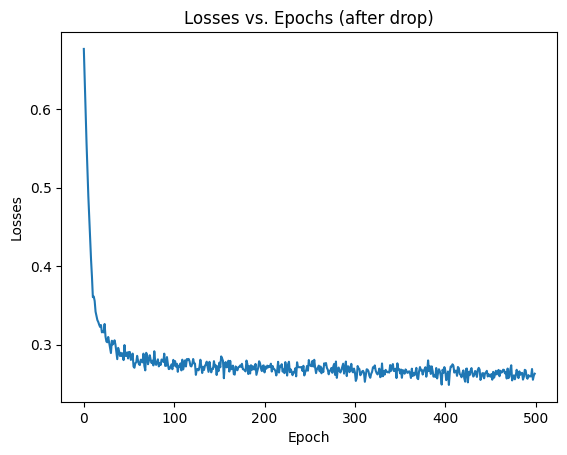

In [334]:
plt.plot(losses)
plt.title("Losses vs. Epochs (after drop)")
plt.ylabel("Losses")
plt.xlabel("Epoch")

In [335]:
with torch.no_grad():
    logits = model(X_test)
    y_pred_proba = torch.sigmoid(logits).detach().numpy().flatten()
y_test_np = y_test.numpy().flatten()
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.4f}")

AUC: 0.9396


Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve after drop')

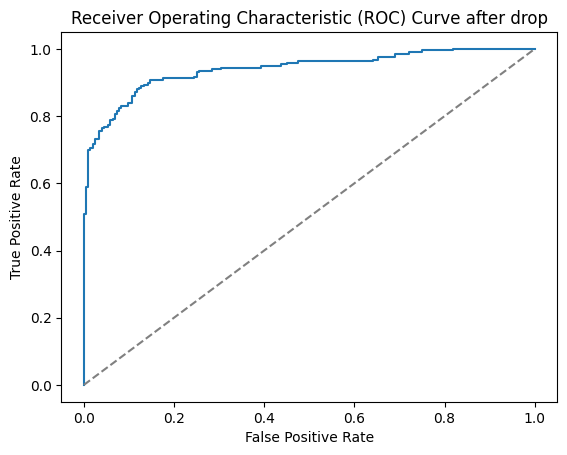

In [336]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve after drop')